## Práctica Propuesta- SimPy SED

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado
* Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.



Lavanderia
Llega vehiculo: Vehiculo-1 (AUTO) a la hora 0.00.
Llega vehiculo: Vehiculo-2 (AUTO) a la hora 0.00.
Llega vehiculo: Vehiculo-3 (BUS) a la hora 0.00.
Llega vehiculo: Vehiculo-4 (BUS) a la hora 0.00.
Llega vehiculo: Vehiculo-5 (BUS) a la hora 0.00.
El vehiculo Vehiculo-1 (AUTO) comienza a trasladarse a la hora 0.00
El vehiculo Vehiculo-2 (AUTO) comienza a trasladarse a la hora 0.00
El vehiculo Vehiculo-3 (BUS) comienza a trasladarse a la hora 0.00
Llega vehiculo: Vehiculo-6 (AUTO) a la hora 1.00.
Entra vehiculo a lavarse: Vehiculo-1 (AUTO) a la hora 1.00.
Entra vehiculo a lavarse: Vehiculo-2 (AUTO) a la hora 1.00.
Llega vehiculo: Vehiculo-7 (FURGONETA) a la hora 3.00.
Entra vehiculo a lavarse: Vehiculo-3 (BUS) a la hora 4.00.
Llega vehiculo: Vehiculo-8 (BUS) a la hora 4.00.
Llega vehiculo: Vehiculo-9 (BUS) a la hora 6.00.
Llega vehiculo: Vehiculo-10 (FURGONETA) a la hora 7.00.
Removido  {41%} suciedad vehiculo => Vehiculo-1 (AUTO) 
Removido  {51%} suciedad vehiculo => Vehiculo

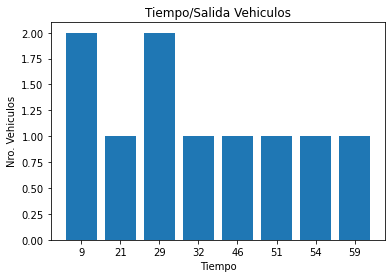

Resultados por vehiculo
Se han terminado de lavar 5 vehiculos del tipo BUS en 60 minutos
Se han terminado de lavar 4 vehiculos del tipo AUTO en 60 minutos
Se han terminado de lavar 1 vehiculos del tipo FURGONETA en 60 minutos


In [65]:
#LAVANDERIA TRABAJO CON 3 MAQUINAS
import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 1
# Tiempo de simulación
TIEMPO_SIMULACION = 60


traslado={}
traslado[1] = 4
traslado[2] = 1
traslado[3] = 2

lavado_inicio={}
lavado_inicio[1] = 15
lavado_inicio[2] = 7
lavado_inicio[3] = 12

lavado_fin={}
lavado_fin[1] = 20
lavado_fin[2] = 10
lavado_fin[3] = 15

vehiculos={}
vehiculos[1] = 'BUS'
vehiculos[2] = 'AUTO'
vehiculos[3] = 'FURGONETA'

contador_vehiculos = {}
contador_vehiculos[1] = 0
contador_vehiculos[2] = 0
contador_vehiculos[3] = 0


tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, ):
        self.env=environment
        self.maquinas = simpy.Resource(environment, num_maquinas)
        
    def lavar_vehiculo(self, vehiculo, tipo):

        yield self.env.timeout(random.randint(lavado_inicio[tipo],lavado_fin[tipo]))
        
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia,tipo):
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina

        print('El vehiculo %s comienza a trasladarse a la hora %.2f' % (nombre,env.now))

        yield env.timeout(traslado[tipo])

        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(lavanderia.lavar_vehiculo(nombre,tipo))
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))


        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo

    contador_vehiculos[tipo] += 1

def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        tipo = random.randint(1,3)
        env.process(llegada_vehiculo(env, 'Vehiculo-%d (%s)'%(i+1,vehiculos[tipo]),lavanderia,tipo))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo, intervalo+1))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        tipo = random.randint(1,3)
        env.process(llegada_vehiculo(env,'Vehiculo-%d (%s)'%(i+1,vehiculos[tipo]),lavanderia,tipo))

print('Lavanderia')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta3 = list(tiempo.keys())
valores3 = list(tiempo.values())
plt.bar(range(len(tiempo)), valores3, align="center", tick_label=etiqueta3)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

tiempo3 = tiempo

print('Resultados por vehiculo')
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[1],vehiculos[1]))
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[2],vehiculos[2]))
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[3],vehiculos[3]))

Lavanderia
Llega vehiculo: Vehiculo-1 (AUTO) a la hora 0.00.
Llega vehiculo: Vehiculo-2 (AUTO) a la hora 0.00.
Llega vehiculo: Vehiculo-3 (BUS) a la hora 0.00.
Llega vehiculo: Vehiculo-4 (BUS) a la hora 0.00.
Llega vehiculo: Vehiculo-5 (BUS) a la hora 0.00.
El vehiculo Vehiculo-1 (AUTO) comienza a trasladarse a la hora 0.00
El vehiculo Vehiculo-2 (AUTO) comienza a trasladarse a la hora 0.00
El vehiculo Vehiculo-3 (BUS) comienza a trasladarse a la hora 0.00
El vehiculo Vehiculo-4 (BUS) comienza a trasladarse a la hora 0.00
Llega vehiculo: Vehiculo-6 (AUTO) a la hora 1.00.
Entra vehiculo a lavarse: Vehiculo-1 (AUTO) a la hora 1.00.
Entra vehiculo a lavarse: Vehiculo-2 (AUTO) a la hora 1.00.
Llega vehiculo: Vehiculo-7 (FURGONETA) a la hora 3.00.
Entra vehiculo a lavarse: Vehiculo-3 (BUS) a la hora 4.00.
Entra vehiculo a lavarse: Vehiculo-4 (BUS) a la hora 4.00.
Llega vehiculo: Vehiculo-8 (AUTO) a la hora 4.00.
Llega vehiculo: Vehiculo-9 (BUS) a la hora 5.00.
Llega vehiculo: Vehiculo-10 (B

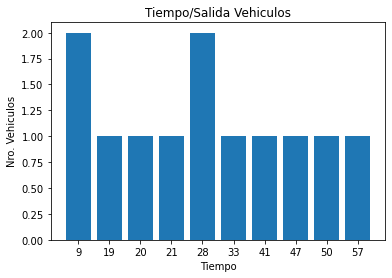

Resultados por vehiculo
Se han terminado de lavar 7 vehiculos del tipo BUS en 60 minutos
Se han terminado de lavar 4 vehiculos del tipo AUTO en 60 minutos
Se han terminado de lavar 1 vehiculos del tipo FURGONETA en 60 minutos


In [66]:
#LAVANDERIA TRABAJO CON 4 MAQUINAS
import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 1
# Tiempo de simulación
TIEMPO_SIMULACION = 60


traslado={}
traslado[1] = 4
traslado[2] = 1
traslado[3] = 2

lavado_inicio={}
lavado_inicio[1] = 15
lavado_inicio[2] = 7
lavado_inicio[3] = 12

lavado_fin={}
lavado_fin[1] = 20
lavado_fin[2] = 10
lavado_fin[3] = 15

vehiculos={}
vehiculos[1] = 'BUS'
vehiculos[2] = 'AUTO'
vehiculos[3] = 'FURGONETA'

contador_vehiculos = {}
contador_vehiculos[1] = 0
contador_vehiculos[2] = 0
contador_vehiculos[3] = 0


tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, ):
        self.env=environment
        self.maquinas = simpy.Resource(environment, num_maquinas)
        
    def lavar_vehiculo(self, vehiculo, tipo):

        yield self.env.timeout(random.randint(lavado_inicio[tipo],lavado_fin[tipo]))
        
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia,tipo):
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina

        print('El vehiculo %s comienza a trasladarse a la hora %.2f' % (nombre,env.now))

        yield env.timeout(traslado[tipo])

        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(lavanderia.lavar_vehiculo(nombre,tipo))
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))


        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo

    contador_vehiculos[tipo] += 1

def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        tipo = random.randint(1,3)
        env.process(llegada_vehiculo(env, 'Vehiculo-%d (%s)'%(i+1,vehiculos[tipo]),lavanderia,tipo))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo, intervalo+1))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        tipo = random.randint(1,3)
        env.process(llegada_vehiculo(env,'Vehiculo-%d (%s)'%(i+1,vehiculos[tipo]),lavanderia,tipo))

print('Lavanderia')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta4 = list(tiempo.keys())
valores4 = list(tiempo.values())
plt.bar(range(len(tiempo)), valores4, align="center", tick_label=etiqueta4)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

tiempo4 = tiempo

print('Resultados por vehiculo')
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[1],vehiculos[1]))
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[2],vehiculos[2]))
print('Se han terminado de lavar %d vehiculos del tipo %s en 60 minutos' % (contador_vehiculos[3],vehiculos[3]))

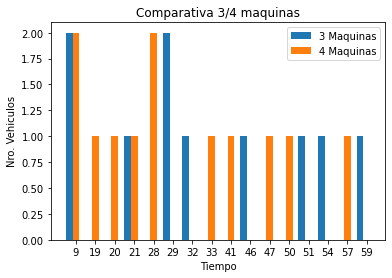

In [73]:
from cProfile import label
import numpy as np
for x in tiempo3:
    if x not in tiempo4:
        tiempo4[x]=0

for x in tiempo4:
    if x not in tiempo3:
        tiempo3[x]=0
    
val3 = []
val4 = []
eti = []

for x in range(60):
    if x in tiempo4:
        val3.append(tiempo3[x])
        val4.append(tiempo4[x])
        eti.append(x)

indice = np.arange(len(tiempo3))
plt.bar(indice, val3, width=0.35, tick_label=eti,label='3 Maquinas')
plt.bar(indice+0.35, val4, width=0.35, tick_label=eti,label='4 Maquinas')
plt.title("Comparativa 3/4 maquinas")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.legend(loc='best')
plt.show()